In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
from hist.get_data import get_data, get_data_in_np

In [4]:
file_loc = '/media/jykim/ssd_T5/storage/01_recon/pi0veto_calib/D2kmpippi0/ntuple/control_recon_mdst_30M.root'

In [5]:
base_filter = 'antiKstarpi0_rank_Dstp==1'

base_filter += '&& abs(antiKstar_InvM - 0.89555)<0.06 && abs(Dstarp_Q - 0.00593)<0.0006 && Dstarp_CMS_p>2.3'
# base_filter = 'Pis_charge==1'
tree = 'control'

In [6]:
signal_variables = ['D0_M','antiKstar_InvM','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','antiKstarpi0_rank_Dstp','Pis_charge']


In [7]:
pd_D2kmpippi0 = get_data(file=file_loc, tree=tree, base_filter=base_filter,variables=signal_variables )


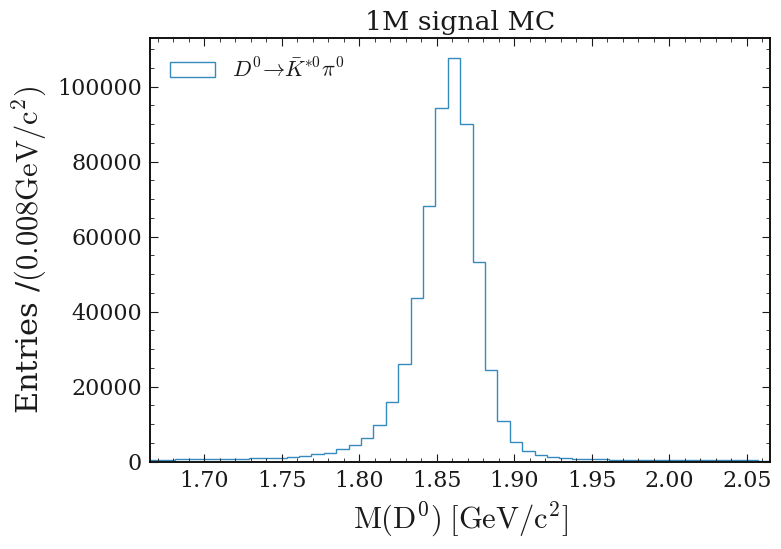

In [9]:
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


# df = pd_D2antiKstar_1M.query('abs(antiKstar_InvM - 0.89555)<0.06 & abs(Dstarp_Q - 0.00593)<0.0006 & Dstarp_CMS_p>2.3')
df = pd_D2kmpippi0
plt.hist(df["D0_M"],bins=xm,histtype='step',label=r'$D^0 \to \bar{K}^{*0} \pi^0$');


plt.legend(loc="upper left")
# ax.set_title(r'$D^0 \to K^0_S \gamma$ in ' )
ax.set_title('1M signal MC')
ax.set_xlim(1.665,2.065)

n, xe = np.histogram(df["D0_M"], bins=50, range=(1.665,2.065))

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');


In [10]:
# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe

from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon

iminuit version: 2.15.2


In [164]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [165]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

In [166]:
PDF = signal_crystalball

In [167]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST, s=73000 ,alpha=0.51, n=119, CB_mu=1.86,CB_sigma=0.02)

In [168]:
m.limits["n"]=(0,500)

m.limits["alpha"]=(0,5)
m.limits["CB_sigma"]=(0, 0.5)

m.limits["CB_mu"]=(1.78,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.831e+06                 │              Nfcn = 170              │
│ EDM = 2.46e+04 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  73.00e3  │  0.27e3   │            │            │    0    │         │       │
│ 1 │ alpha    │  0.5100   │  0.0029   │            │            │    0    │    5    │       │
│ 2 │ n        │    119    │     6     │            │            │    0    │   500   │       │
│ 3 │ CB_mu    │  1.86000  │  0.00011  │            │            │  1.78   │   1.9   │       │
│ 4 │ CB_sigma │ 20.00e-3  │  0.12e-3  │            │            │    0    │   0.5   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │   7.3e+04 -8.41e-06  -0.00333  1.62e-07 -2.57e-07 │
│    alpha │ -8.41e-06  8.49e-06  -0.00105 -1.64e-07  1.83e-07 │
│        n │  -0.00333  -0.00105      34.4  4.48e-06 -9.26e-08 │
│    CB_mu │  1.62e-07 -1.64e-07  4.48e-06   1.3e-08 -7.55e-09 │
│ CB_sigma │ -2.57e-07  1.83e-07 -9.26e-08 -7.55e-09  1.32e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [169]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=24578.722824687735 edm_goal=0.0002 errordef=1.0 fval=-1830883.3485713385 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=170 ngrad=0 reduced_chi2=nan time=0.1596222500083968>

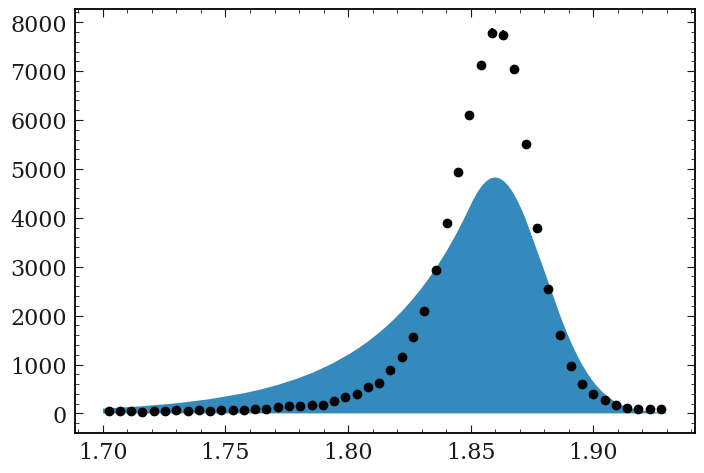

In [170]:
COST.visualize(m.values)

In [171]:
m.interactive()

true entries = 73322


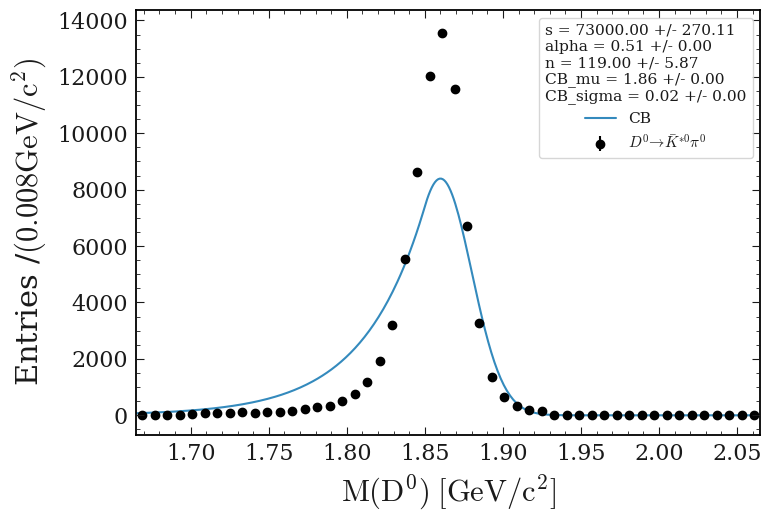

In [172]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [97]:
xr = (1.70, 1.93)

In [110]:
def same_mu_extended_gauss_crystalball(xe, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(xe, alpha, n, mu, CB_sigma) + s2 * norm.pdf(xe, mu, sigma)
#     return func
    s = s1 + s2
    return s, func

In [111]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

In [112]:
PDF = same_mu_extended_gauss_crystalball

In [113]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))

In [114]:
# COST = cost.ExtendedUnbinnedNLL(dataset, PDF)

COST = cost.ExtendedBinnedNLL(n,xe, PDF)

m = Minuit(COST,  s1=49000,s2=80000, alpha=5.8, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [115]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

ValueError: setting an array element with a sequence.

In [79]:
m.minos()

ValueError: setting an array element with a sequence.

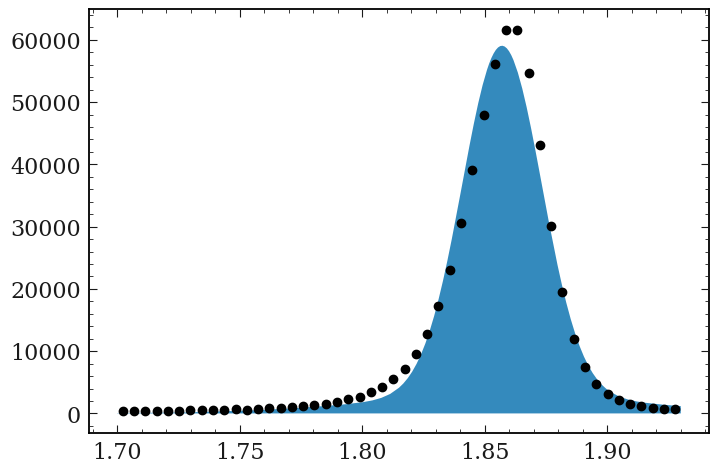

In [25]:
COST.visualize(m.values)

TypeError: unsupported format string passed to NoneType.__format__

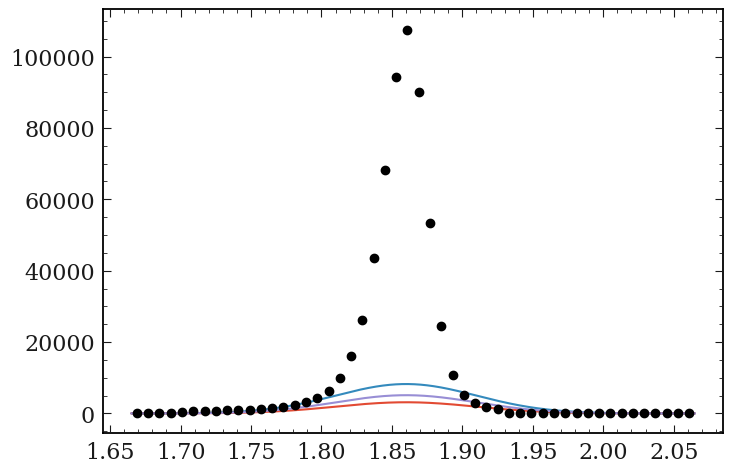

In [61]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,1000)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
# alpha, n, mu, CB_sigma
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")

plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [42]:
def same_mu_extended_2gauss_crystalball(x, s1, s2,s3, alpha, n, CB_sigma, mu, sigma, sigma2):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma) + s3 * norm.pdf(x, mu, sigma2)
#     return func
    s = s1 + s2 + s3
    return s, func

In [43]:
dataset = df
dataset = dataset[(dataset['D0_M'] < 1.93) & (dataset['D0_M'] > 1.70)  ]['D0_M']

# dataset = dataset[(dataset['D0_M'] < 1.89) & (dataset['D0_M'] > 1.83)  ]['D0_M']

In [44]:
PDF = same_mu_extended_2gauss_crystalball

In [45]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=30000, s3= 2000, alpha=1, n=30, CB_sigma=0.05, mu=1.86, sigma=0.05,sigma2=0.05)

In [46]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["s3"]=(0,None)
m.limits["n"]=(0,None)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma","sigma2"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.709e+07                 │             Nfcn = 1366              │
│ EDM = 9.96 (Goal: 0.0002)        │           time = 27.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  172.5e3  │   0.7e3   │            │            │    0    │         │       │
│ 1 │ s2       │  266.3e3  │   0.6e3   │            │            │    0    │         │       │
│ 2 │ s3       │  142.7e3  │   0.6e3   │            │            │    0    │         │       │
│ 3 │ alpha    │   0.349   │   0.004   │            │            │    0    │         │       │
│ 4 │ n        │    113    │    19     │            │            │    0    │         │       │
│ 5 │ CB_sigma │ 10.90e-3  │  0.14e-3  │            │            │    0    │   0.1   │       │
│ 6 │ mu       │  1.86008  │  0.00004  │            │            │   1.8   │   1.9   │       │
│ 7 │ sigma    │ 13.64e-3  │  0.04e-3  │            │            │    0    │   0.1   │       │
│ 8 │ sigma2   │ 24.94e-3  │  0.07e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│          │        s1        s2        s3     alpha         n  CB_sigma        mu     sigma    sigma2 │
├──────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│       s1 │  4.24e+05  4.57e+04  1.23e+05     0.171      -115  -0.00111    0.0032  0.000535  -0.00282 │
│       s2 │  4.57e+04   3.8e+05  1.19e+05    -0.116       822  0.000744   -0.0014 -0.000543   0.00214 │
│       s3 │  1.23e+05  1.19e+05  3.41e+05   -0.0173       618   0.00193 -0.000774   0.00402  -0.00763 │
│    alpha │     0.171    -0.116   -0.0173  2.01e-05   -0.0203  5.91e-07 -1.44e-07  7.52e-08  1.14e-07 │
│        n │      -115       822       618   -0.0203       352  -1.7e-06  6.51e-05  7.19e-05 -0.000143 │
│ CB_sigma │  -0.00111  0.000744   0.00193  5.91e-07  -1.7e-06  1.98e-08 -4.54e-09  2.82e-09  3.06e-09 │
│       mu │    0.0032   -0.0014 -0.000774 -1.44e-07  6.51e-05 -4.54e-09  1.72e-09 -5.24e-10 -8.74e-10 │
│    sigma │  0.000535 -0.000543   0.00402  7.52e-08  7.19e-05  2.82e-09 -5.24e-10  1.71e-09  8.88e-10 │
│   sigma2 │  -0.00282   0.00214  -0.00763  1.14e-07 -0.000143  3.06e-09 -8.74e-10  8.88e-10  5.48e-09 │
└──────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

In [47]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=9.964808741826761 edm_goal=0.0002 errordef=1.0 fval=-17087533.32829032 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=1366 ngrad=0 reduced_chi2=nan time=27.83437449700432>

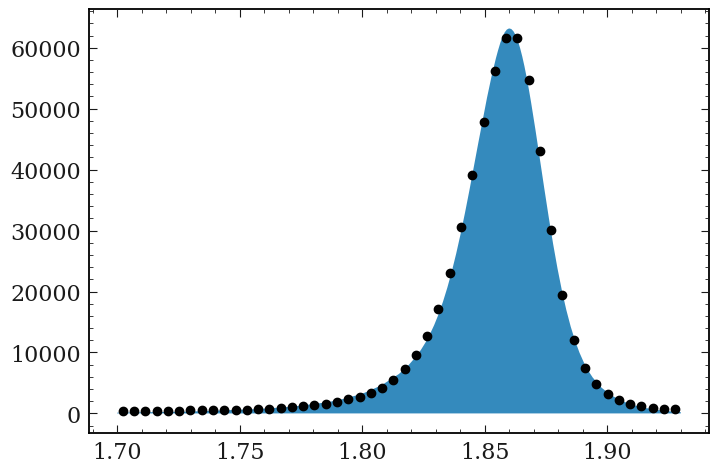

In [48]:
COST.visualize(m.values)

true entries = 581766


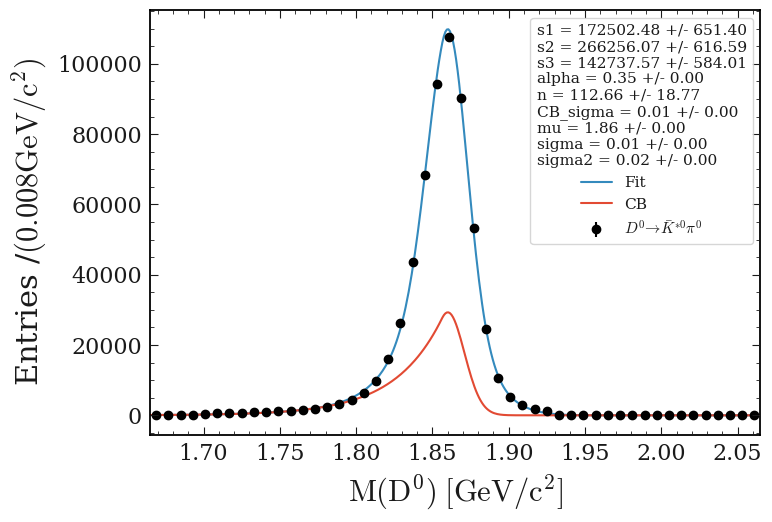

In [49]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \bar{K}^{*0} \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, same_mu_extended_2gauss_crystalball(xm, *m.values)[1] * dx[0] ,label="Fit")
plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['alpha'], m.values['n'], m.values['mu'], m.values['CB_sigma']) * dx[0],label="CB")




# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))